In [1]:
!python --version

Python 3.6.8


# 分群分析 Cluster Analysis 
- 分群定義: 將相似的資料分組的分析過程
    - 樣本在分群裡應該要很相似
    - 樣本在分群外應該要很不相似
    
- 屬於機器學習理最普遍的非監督式學習(unsupervised learning)方法
    - 非監督式學習: 從原始資料學習(不需要資料標籤/類別)，相對於監督式學習(supervised learning) 需要在一開始就有資料標簽/類別 
    - 在資訊萃取和資料應用上是普遍且重要的分析方法
    
    
- 在沒有分類條件前，找出分類條件的重要工具

In [0]:
# 載入所需套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

---
# 演示範例: iris dataset

In [0]:
# load data 
# Split data to X(feature) and Y(label)
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target

In [0]:
# Change default iris dataset format to dataframe format for visualize easily
iris_data = pd.DataFrame(data = iris_X, columns = iris.feature_names)
iris_data["class name"] = iris_Y
iris_data["class eng name"] = iris.target_names[iris_Y]

In [5]:
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class name,class eng name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [6]:
# random shuffle the dataframe for showing all class names 
shuffle(iris_data).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class name,class eng name
98,5.1,2.5,3.0,1.1,1,versicolor
81,5.5,2.4,3.7,1.0,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
140,6.7,3.1,5.6,2.4,2,virginica
3,4.6,3.1,1.5,0.2,0,setosa
115,6.4,3.2,5.3,2.3,2,virginica
40,5.0,3.5,1.3,0.3,0,setosa
106,4.9,2.5,4.5,1.7,2,virginica
96,5.7,2.9,4.2,1.3,1,versicolor
137,6.4,3.1,5.5,1.8,2,virginica


---
## 鳶尾花資料集介紹

**欄位**
- Sepal length (cm): 花萼長度
- Sepal width (cm) : 花萼寬度
- Petal length (cm): 花瓣長度
- Petal width (cm): 花瓣寬度
- class: 屬種 
    - 0: Iris Setosa 山鳶尾
    - 1: Iris Versicolour 變色鳶尾
    - 2: Iris Virginica 維吉尼亞鳶尾

In [7]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## iris_X 和 iris_Y資料形式
- iris_X 是一個(150,4) 的 numpy array
- iris_Y 是一個(150,) 的 numpy array

In [8]:
# print iris_X type, shape, and first 3 rows of data
print(type(iris_X))
print(iris_X.shape)
print(iris_X[0:3,])
print('---')

# print iris_Y type, shape, and first 3 rows of data
print(type(iris_Y))
print(iris_Y.shape)
print(iris_Y[0:3])

<class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
---
<class 'numpy.ndarray'>
(150,)
[0 0 0]


In [9]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class name
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


---
## 資料分布繪圖(2維座標)

**根據不同的XY欄位進行資料繪圖**
- Sepal length (cm): 花萼長度
- Sepal width (cm) : 花萼寬度
- Petal length (cm): 花瓣長度
- Petal width (cm): 花瓣寬度

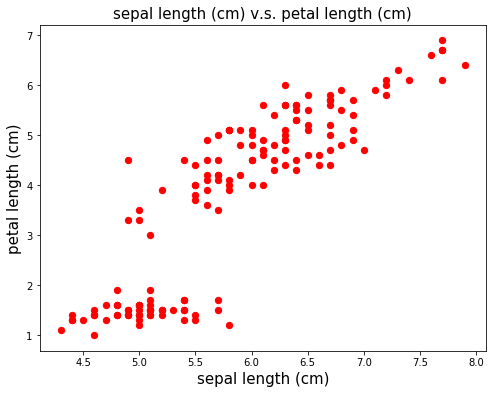

In [10]:
plot_x = 'sepal length (cm)' #@param {type:"string"} ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
plot_y = 'petal length (cm)' #@param {type:"string"} ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
plot_color = 'red' #@param {type:"string"} ["red", "green", "blue"] {allow-input: true}

plt.figure(figsize=(8,6))
plt.scatter(x = iris_data[plot_x],
            y = iris_data[plot_y],
            marker = "o", color = plot_color, s = 40)
plt.xlabel(plot_x, fontsize = 15)
plt.ylabel(plot_y, fontsize = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title(plot_x+' v.s. '+plot_y, fontsize = 15)
plt.show()

---
## 資料分布繪圖(3維座標)

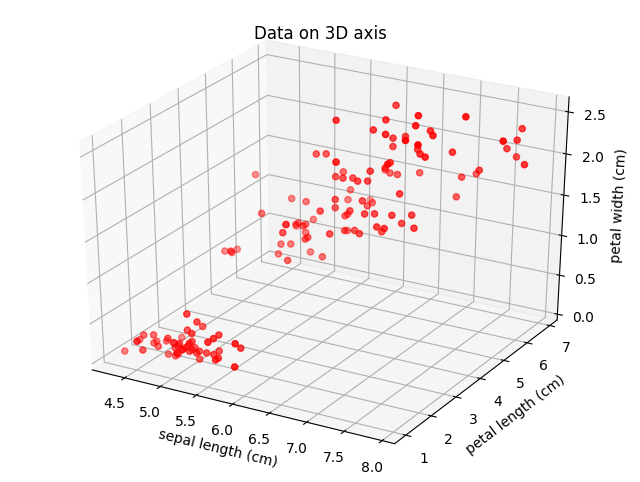

In [11]:
plot_x = 'sepal length (cm)' #@param {type:"string"} ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
plot_y = 'petal length (cm)' #@param {type:"string"} ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
plot_z = 'petal width (cm)' #@param {type:"string"} ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
plot_color = 'red' #@param {type:"string"} ["red", "green", "blue"] {allow-input: true}


plt.rcdefaults()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs =  iris_data[plot_x], 
           ys = iris_data[plot_y], 
           zs = iris_data[plot_z], 
           s = 20, color = plot_color) #s代表size
ax.set_xlabel(plot_x)
ax.set_ylabel(plot_y)
ax.set_zlabel(plot_z)
ax.set_title('Data on 3D axis')

plt.show()

---
## 動手實作分群

Try to Clustering with K-means by youself

**K-Means步驟**
- Step 0: 觀察並選擇分群數k
- Step 1: 隨機選擇開始群聚中心點
- Step 2: 計算所有點到各中心的距離(預設是歐式距離)
- Step 3: 以據相對距離，將所有點妥善分群
- Step 4: 根據新的分群，重新決定分群中心點
- Step 5: 重複步驟2-4，直到分群結果不變

In [12]:
n_clust = 4 #@param {type:"integer"}
kmeans = KMeans(n_clusters = n_clust,  random_state = 9527)
kms_fit = kmeans.fit(iris_X)
kms_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9527, tol=0.0001, verbose=0)

In [14]:
kms_cluster_label = kms_fit.labels_
print(kms_cluster_label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 1 2 2 2 2 3 2 2 2 1
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 1
 2 1]


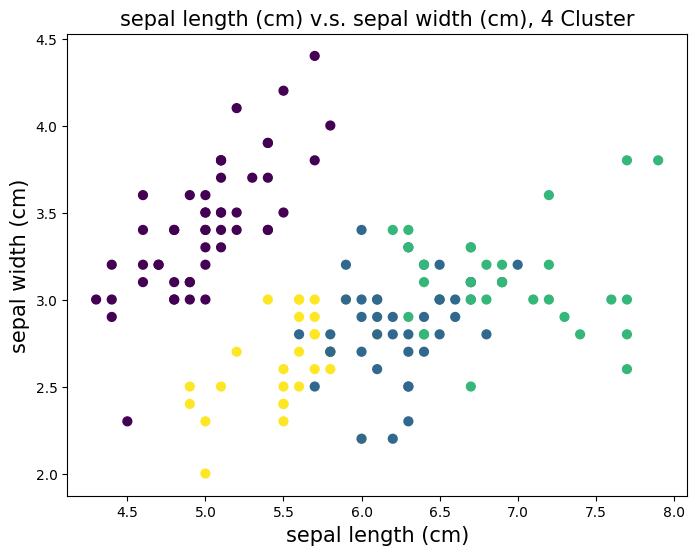

In [15]:
plot_x = 'sepal length (cm)' #@param {type:"string"} ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
plot_y = 'sepal width (cm)' #@param {type:"string"} ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

plt.figure(figsize=(8,6))
plt.scatter(x = iris_data[plot_x],
            y = iris_data[plot_y],
            marker = "o", s = 40, c = kms_cluster_label)
plt.xlabel(plot_x, fontsize = 15)
plt.ylabel(plot_y, fontsize = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title(plot_x+' v.s. '+plot_y+",%2d Cluster" % kms_fit.n_clusters, 
          fontsize = 15)
plt.show()


## 分群常見問題

- 分群結果怎樣算好?
- 分成幾群?

**核心原則:**

- 要組內變異小，組間變異大。
- 最佳分群數選擇 elbow method 轉折處

---
### WCSS (Within Cluster Sum of Squares)

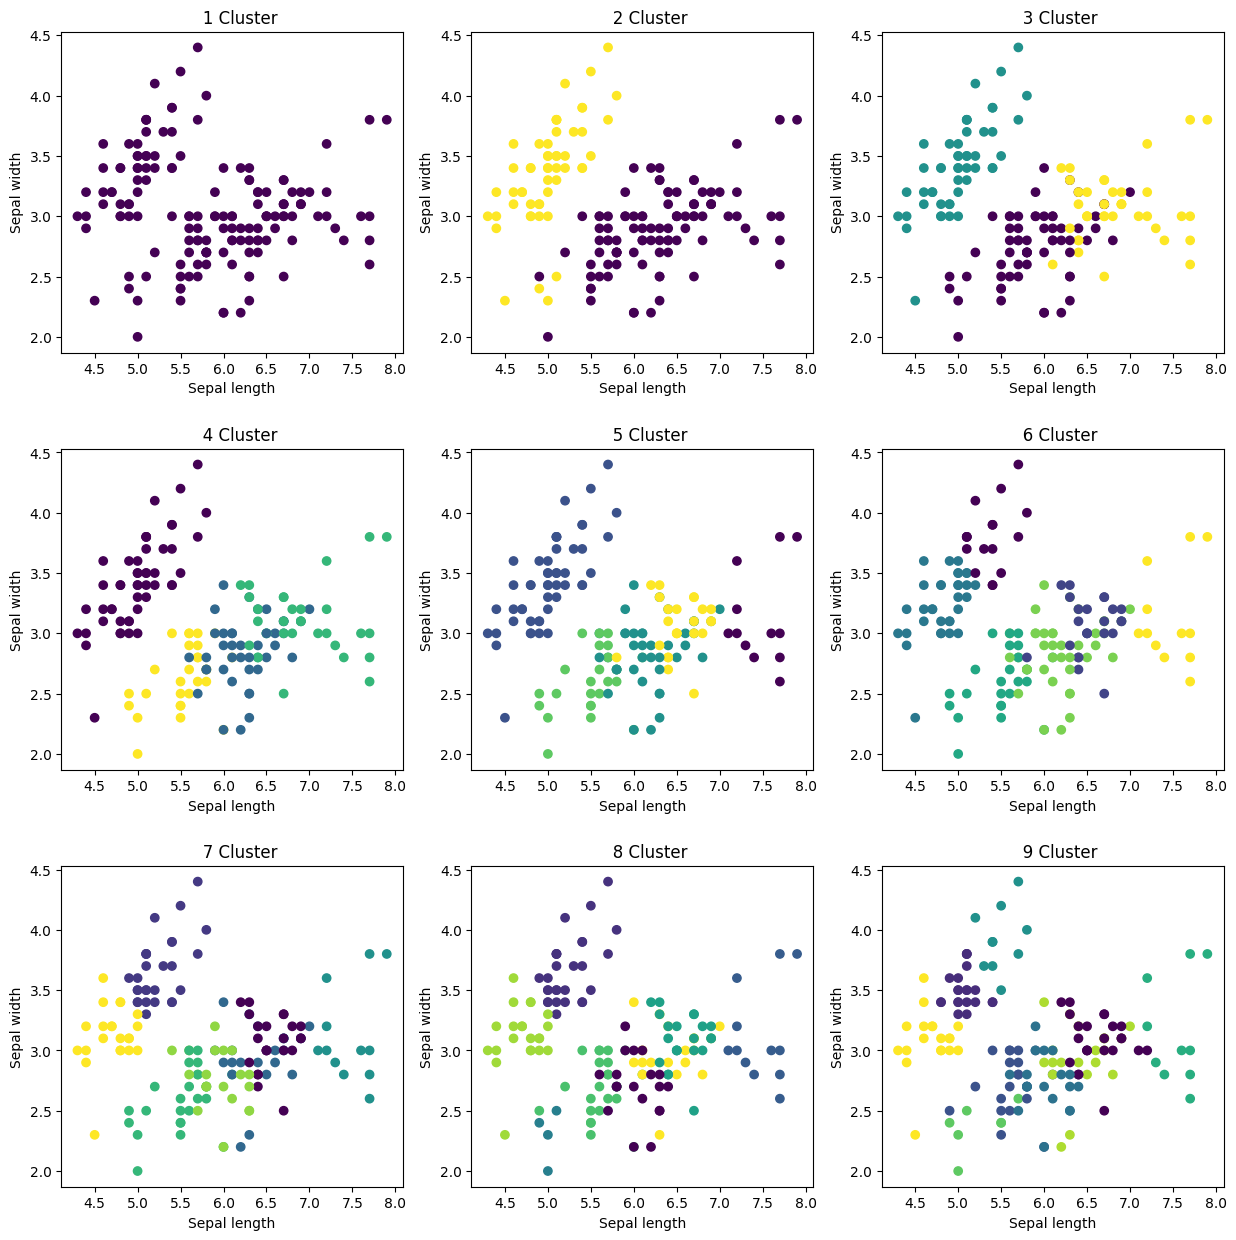

In [16]:
# Choose K and plot the k cluster 
wcss = []
plt.figure(figsize=(15, 15))
ks = range(1,10)
for k in ks:
    kmeans = KMeans(n_clusters = k,  random_state = 9527)
    kms_fit = kmeans.fit(iris_X)
    kms_cluster_label = kms_fit.labels_
    wcss.append(kmeans.inertia_)
    # 繪製圖形
    plt.subplot(3,3,k)
    plt.subplots_adjust(hspace = 0.3)
    plt.scatter(iris_X[:,0], iris_X[:,1], c = kms_cluster_label)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title("%4d Cluster" % k)
    
plt.show()

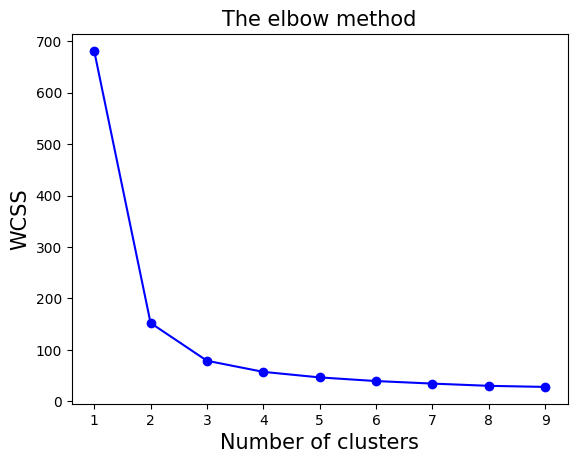

In [17]:
# Graph of WCSS
plt.plot(range(1, 10), wcss, 'bo-')
plt.title('The elbow method', fontsize = 15)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15) 
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 

This is **when the within cluster sum of squares (WCSS) doesn't decrease significantly** with every iteration. 

Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.


---
## 最後分群結果

分群數選擇3群。

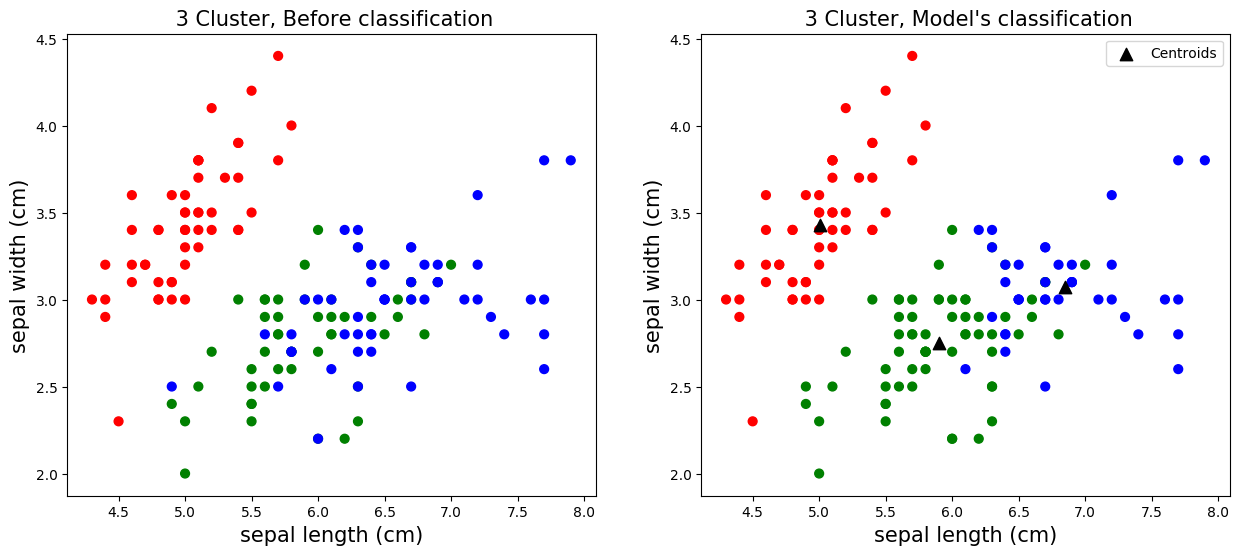

In [35]:
kmeans = KMeans(n_clusters = 3,  random_state = 9527)
kms_fit = kmeans.fit(iris_X)
kms_cluster_label = kms_fit.labels_

plot_x = 'sepal length (cm)' #@param {type:"string"} ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
plot_y = 'sepal width (cm)' #@param {type:"string"} ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

#Visualising the clusters
colors = np.array(['red', 'green', 'blue'])
plt.figure(figsize=(15,6))

# The fudge to reorder the cluster ids.
predictedY = np.choose(kms_cluster_label, [1, 0, 2]).astype(np.int64)

# Plot the classifications that we saw earlier between Petal Length and Petal Width
plt.subplot(1, 2, 1)
plt.scatter(x = iris_data[plot_x],
            y = iris_data[plot_y],
            s = 40, 
            c = colors[iris_data['class name']])
plt.xlabel(plot_x, fontsize = 15)
plt.ylabel(plot_y, fontsize = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title("%2d Cluster" % kms_fit.n_clusters+', Before classification', 
          fontsize = 15)

# Plot the classifications according to the model
plt.subplot(1, 2, 2)
plt.scatter(x = iris_data[plot_x],
            y = iris_data[plot_y],
            marker = "o", s = 40, 
            c = colors[predictedY])
plt.scatter(kms_fit.cluster_centers_[:, 0], 
            kms_fit.cluster_centers_[:,1], 
            marker = "^",label = 'Centroids', s = 80, 
            c = 'black')
plt.xlabel(plot_x, fontsize = 15)
plt.ylabel(plot_y, fontsize = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title("%2d Cluster" % kms_fit.n_clusters+", Model's classification",
          fontsize = 15)
plt.legend()
plt.show()


In [36]:
pd.crosstab(iris_data['class name'], predictedY)

col_0,0,1,2
class name,,,
0,50,0,0
1,0,48,2
2,0,14,36


---
# Kmeans Pros and Cons

Here is a list of the main advantages and disadvantages of this algorithm.

**Advantages:**
- K-Means is simple and computationally efficient.
- It is very intuitive and their results are easy to visualize.

**Disadvantages:**
- K-Means is highly scale dependent and is not suitable for data of varying shapes and densities.
- Evaluating results is more subjective. It requires much more human evaluation than trusted metrics.

---
# 實際例子: 巴西電商

---
# reference

**Clustering**

- Google Machine Learning Crash Crouse (MLCC)
- https://constantgeeks.com/2017/01/11/playing-with-iris-data-kmeans-clustering-in-python/
- https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset
- https://www.youtube.com/watch?v=asW8tp1qiFQ